In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
match=pd.read_csv('matches (1).csv')
delivery=pd.read_csv('deliveries.csv')

ipl=delivery.merge(match,left_on='match_id',right_on='id')


In [16]:
# Purple cap holders for all seasons

mask1=ipl['dismissal_kind']=='caught'
mask2=ipl['dismissal_kind']=='bowled'
mask3=ipl['dismissal_kind']=='lbw'
mask4=ipl['dismissal_kind']=='stumped'
mask5=ipl['dismissal_kind']=='caught and bowled'
mask6=ipl['dismissal_kind']=='hit wicket'

In [20]:
wicket=ipl[mask1 | mask2 | mask3 | mask4 | mask5 | mask6]

In [28]:
wicket.groupby(['season','bowler'])['player_dismissed'].count().sort_values(ascending=False).reset_index().drop_duplicates(subset='season').sort_values('season')[['season','player_dismissed']]

,season,player_dismissed
19,2008,22
12,2009,23
22,2010,21
1,2011,28
5,2012,25
0,2013,32
13,2014,23
3,2015,26
15,2016,23
4,2017,26


In [55]:
# Top 10 batsman(on the basis of total runs) and top 10 bowlers(in terms of total wockets) and create a heapmap

mask1=ipl['dismissal_kind']=='caught'
mask2=ipl['dismissal_kind']=='bowled'
mask3=ipl['dismissal_kind']=='lbw'
mask4=ipl['dismissal_kind']=='stumped'
mask5=ipl['dismissal_kind']=='caught and bowled'
mask6=ipl['dismissal_kind']=='hit wicket'

In [73]:
wicket=ipl[mask1 | mask2 | mask3 | mask4 | mask5 | mask6]

In [74]:
Top_batsman=ipl.pivot_table(index='batsman',values='batsman_runs',aggfunc='sum').sort_values('batsman_runs',ascending=False).head(10)

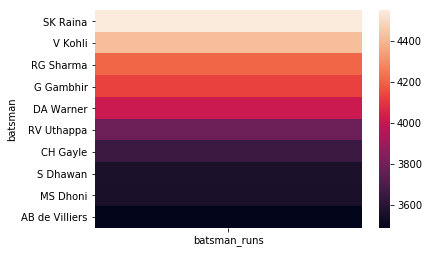

In [75]:
sns.heatmap(Top_batsman)

In [76]:
Top_bowler=wicket.pivot_table(index='bowler',values='player_dismissed',aggfunc='count').sort_values('player_dismissed',ascending=False).head(10)

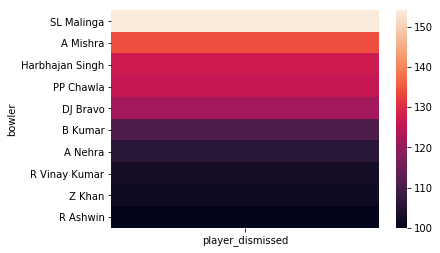

In [77]:
sns.heatmap(Top_bowler)